In [16]:

#Using data in file 'data/world_bank_projects.json' do the following:
#Find the 10 countries with most projects
#Find the top 10 major project themes (using column 'mjtheme_namecode')
#In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

In [70]:
%matplotlib inline
import pandas as pd
import numpy as np
import json
from pandas.io.json import json_normalize


In [71]:
wbDF = pd.read_json('data/world_bank_projects.json')
wbDF.head(2)

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{'$oid': '52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{'Name': 'Education for all', 'Percent': 100}","[{'code': '65', 'name': 'Education for all'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{'$oid': '52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{'Name': 'Other economic management', 'Percent...","[{'code': '24', 'name': 'Other economic manage...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en


In [72]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [20]:
#wbData = json.load((open('data/world_bank_projects.json')))
#wbData

In [21]:
#json_normalize(wbData, 'countryshortname')

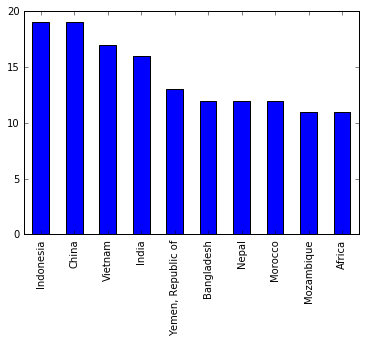

In [22]:
#10 countries with most projects
wbDF.countryshortname.value_counts().head(10).plot(kind = 'bar')

In [23]:
#Find the top 10 major project themes (using column 'mjtheme_namecode')
wbDF.mjtheme_namecode.head()

0    [{'code': '8', 'name': 'Human development'}, {...
1    [{'code': '1', 'name': 'Economic management'},...
2    [{'code': '5', 'name': 'Trade and integration'...
3    [{'code': '7', 'name': 'Social dev/gender/incl...
4    [{'code': '5', 'name': 'Trade and integration'...
Name: mjtheme_namecode, dtype: object

In [101]:
pths = json_normalize(wbData, 'mjtheme_namecode')
pths.head()

,code,name
0,8,Human development
1,11,
2,1,Economic management
3,6,Social protection and risk management
4,5,Trade and integration


In [103]:
pths[pths.name == ''] = 'Not Specified' 



# NEED TO DISCUSS!!!




pths.head()


,code,name
0,8,Human development
1,Not Specified,Not Specified
2,1,Economic management
3,6,Social protection and risk management
4,5,Trade and integration


In [108]:
pt = pths.name.value_counts().head(10)
pt


Environment and natural resources management    223
Rural development                               202
Human development                               197
Public sector governance                        184
Social protection and risk management           158
Financial and private sector development        130
Not Specified                                   122
Social dev/gender/inclusion                     119
Trade and integration                            72
Urban development                                47
Name: name, dtype: int64

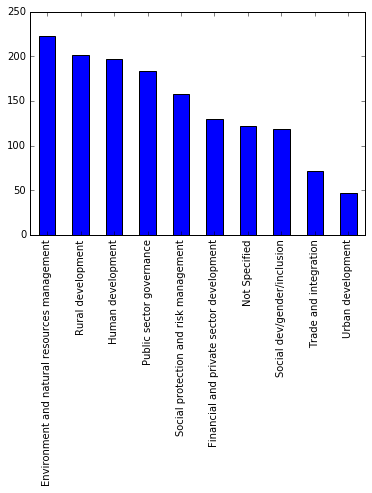

In [109]:
pt.plot(kind = 'bar')